# Contents:
## 1.Creating Features
## 2. Dealing with Messy Data
## 3. Conforming to Statistical Assumptions
## 4. Dealing with Text Data

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
# Importing data
inaugral = pd.read_csv("./Data/inaugural_speeches.csv")
stack = pd.read_csv("./Data/Combined_DS_v10.csv")

# 1. Creating features

## 1.1 getting to know data

In [3]:
# Import pandas
import pandas as pd

# Import so_survey_csv into so_survey_df
so_survey_df = stack.copy()

# Print the first five rows of the DataFrame
print(so_survey_df.head())

# Print the data type of each column
print(so_survey_df.dtypes)

      SurveyDate                                    FormalEducation  \
0  2/28/18 20:20           Bachelor's degree (BA. BS. B.Eng.. etc.)   
1  6/28/18 13:26           Bachelor's degree (BA. BS. B.Eng.. etc.)   
2    6/6/18 3:37           Bachelor's degree (BA. BS. B.Eng.. etc.)   
3    5/9/18 1:06  Some college/university study without earning ...   
4  4/12/18 22:41           Bachelor's degree (BA. BS. B.Eng.. etc.)   

   ConvertedSalary Hobby       Country  StackOverflowJobsRecommend  \
0              NaN   Yes  South Africa                         NaN   
1          70841.0   Yes       Sweeden                         7.0   
2              NaN    No       Sweeden                         8.0   
3          21426.0   Yes       Sweeden                         NaN   
4          41671.0   Yes            UK                         8.0   

      VersionControl  Age  Years Experience Gender   RawSalary  
0                Git   21                13   Male         NaN  
1     Git;Subversion  

In [4]:
## Selecting specific dtypes
# Create subset of only the numeric columns
so_numeric_df = so_survey_df.select_dtypes(include=['int','float'])

# Print the column names contained in so_survey_df_num
print(so_numeric_df.columns)

Index(['ConvertedSalary', 'StackOverflowJobsRecommend', 'Age',
       'Years Experience'],
      dtype='object')


## 1.2 Dealing with categorical features


In [5]:
# One-hot encoding
# Convert the Country column to a one hot encoded Data Frame
one_hot_encoded = pd.get_dummies(so_survey_df, columns=['Country'], prefix='OH')

# Print the columns names
print(one_hot_encoded.columns)

Index(['SurveyDate', 'FormalEducation', 'ConvertedSalary', 'Hobby',
       'StackOverflowJobsRecommend', 'VersionControl', 'Age',
       'Years Experience', 'Gender', 'RawSalary', 'OH_France', 'OH_India',
       'OH_Ireland', 'OH_Russia', 'OH_South Africa', 'OH_Spain', 'OH_Sweeden',
       'OH_UK', 'OH_USA', 'OH_Ukraine'],
      dtype='object')


In [6]:
# Dummy Encoding
# Create dummy variables for the Country column
dummy = pd.get_dummies(so_survey_df, columns=['Country'], drop_first=True, prefix='DM')

# Print the columns names
print(dummy.columns)

print('\n As far as code is concerned, the diff between one-hot encoding and dummy encoding is that we drop_first in dummy encoding')

Index(['SurveyDate', 'FormalEducation', 'ConvertedSalary', 'Hobby',
       'StackOverflowJobsRecommend', 'VersionControl', 'Age',
       'Years Experience', 'Gender', 'RawSalary', 'DM_India', 'DM_Ireland',
       'DM_Russia', 'DM_South Africa', 'DM_Spain', 'DM_Sweeden', 'DM_UK',
       'DM_USA', 'DM_Ukraine'],
      dtype='object')

 As far as code is concerned, the diff between one-hot encoding and dummy encoding is that we drop_first in dummy encoding


## 1.3 Dealing with uncommon categories

In [7]:
# Create a series out of the Country column
countries = so_survey_df['Country']

# Get the counts of each category
country_counts = countries.value_counts()

# print category counts
print(country_counts)

# Create a mask for only categories that occur less than 10 times
mask = countries.isin(country_counts[country_counts < 10].index)

# Label all other categories as Other
countries[mask] = 'Other'

# Print the updated category counts
print('\n',countries.value_counts())

South Africa    166
USA             164
Spain           134
Sweeden         119
France          115
Russia           97
India            95
UK               95
Ukraine           9
Ireland           5
Name: Country, dtype: int64

 South Africa    166
USA             164
Spain           134
Sweeden         119
France          115
Russia           97
India            95
UK               95
Other            14
Name: Country, dtype: int64


## 1.4 Numeric variables

In [8]:
# Binarizing columns
# Create the Paid_Job column filled with zeros
so_survey_df['Paid_Job'] = 0

# Replace all the Paid_Job values where ConvertedSalary is > 0
so_survey_df.loc[so_survey_df['ConvertedSalary'] > 0, 'Paid_Job'] = 1

# Print the first five rows of the columns
print(so_survey_df[['Paid_Job', 'ConvertedSalary']].head())

   Paid_Job  ConvertedSalary
0         0              NaN
1         1          70841.0
2         0              NaN
3         1          21426.0
4         1          41671.0


In [9]:
# Binning values
# For many continuous values you will care less about the exact value of a numeric column, but instead care about the bucket it falls into. 
# This can be useful when plotting values, or simplifying your machine learning models. 
# It is mostly used on continuous variables where accuracy is not the biggest concern e.g. age, height, wages.

# Import numpy
import numpy as np

# Specify the boundaries of the bins
bins = [-np.inf, 10000, 50000, 100000, 150000, np.inf]

# Bin labels
labels = ['Very low', 'Low', 'Medium', 'High', 'Very high']

# Bin the continuous variable ConvertedSalary using these boundaries
# we can also go for something like bins = 5 for 5 evenly spaced bins
so_survey_df['boundary_binned'] = pd.cut(so_survey_df['ConvertedSalary'], 
                                         bins=bins, labels=labels)

# Print the first 5 rows of the boundary_binned column
print(so_survey_df[['boundary_binned', 'ConvertedSalary']].head())


  boundary_binned  ConvertedSalary
0             NaN              NaN
1          Medium          70841.0
2             NaN              NaN
3             Low          21426.0
4             Low          41671.0


In [10]:
# 2.Dealing with Messy Data

In [11]:
# How sparse is my data?
# Subset the DataFrame
sub_df = so_survey_df[['Age','Gender']]

# Print the number of non-missing values
print(sub_df.notnull().sum())

Age       999
Gender    693
dtype: int64


In [12]:
# Print the locations of the missing values
print(sub_df.head(10).isnull())

     Age  Gender
0  False   False
1  False   False
2  False    True
3  False   False
4  False   False
5  False   False
6  False   False
7  False   False
8  False   False
9  False    True


## 2.2 Dealing with missing values (I)

In [13]:
# Listwise deletion
# The simplest way to deal with missing values in your dataset when they are occurring entirely at random is to remove those rows, also called 'listwise deletion'.

# Create a new DataFrame dropping all incomplete rows
no_missing_values_rows = so_survey_df.dropna()

# Print the shape of the new DataFrame
print(no_missing_values_rows.shape)

# Create a new DataFrame dropping all columns with incomplete rows
no_missing_values_cols = so_survey_df.dropna(how='any', axis=1)

# Print the shape of the new DataFrame
print(no_missing_values_cols.shape)

# Drop all rows where Gender is missing
no_gender = so_survey_df.dropna(subset=['Gender'])

# Print the shape of the new DataFrame
print(no_gender.shape)

print('\n as you can see dropping all rows that contain any missing values may greatly reduce the size of your dataset. So you need to think carefully and consider several trade-offs when deleting missing values.')


(264, 13)
(999, 8)
(693, 13)

 as you can see dropping all rows that contain any missing values may greatly reduce the size of your dataset. So you need to think carefully and consider several trade-offs when deleting missing values.


In [14]:
# replacing missing values

# Print the count of occurrences
print(so_survey_df['Gender'].value_counts())

# Replace missing values
so_survey_df['Gender'].fillna(value='Not Given', inplace=True)

# Print the count of each value
print(so_survey_df['Gender'].value_counts())

Male                                                                         632
Female                                                                        53
Female;Male                                                                    2
Transgender                                                                    2
Non-binary. genderqueer. or gender non-conforming                              1
Male;Non-binary. genderqueer. or gender non-conforming                         1
Female;Male;Transgender;Non-binary. genderqueer. or gender non-conforming      1
Female;Transgender                                                             1
Name: Gender, dtype: int64
Male                                                                         632
Not Given                                                                    306
Female                                                                        53
Female;Male                                                                    2
T

In [15]:
## 2.3 Filling missing values

In [16]:
# Print the first five rows of StackOverflowJobsRecommend column
print(so_survey_df['StackOverflowJobsRecommend'].head())

# Fill missing values with the mean
so_survey_df['StackOverflowJobsRecommend'].fillna(so_survey_df['StackOverflowJobsRecommend'].mean(), inplace=True)

# Round the StackOverflowJobsRecommend values
so_survey_df['StackOverflowJobsRecommend'] = round(so_survey_df['StackOverflowJobsRecommend'])

# Print the first five rows of StackOverflowJobsRecommend column
print(so_survey_df['StackOverflowJobsRecommend'].head())


0    NaN
1    7.0
2    8.0
3    NaN
4    8.0
Name: StackOverflowJobsRecommend, dtype: float64
0    7.0
1    7.0
2    8.0
3    7.0
4    8.0
Name: StackOverflowJobsRecommend, dtype: float64


## 2.3 Dealing with other data issues

In [17]:
# Remove the commas in the column
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].str.replace(',', '')

# Remove the dollar signs in the column
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].str.replace('$','')

print(so_survey_df['RawSalary'].head())

0          NaN
1     70841.00
2          NaN
3     21426.00
4    £41671.00
Name: RawSalary, dtype: object


In [18]:
# Replace the offending characters
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].str.replace('£','')

# Convert the column to float
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].astype('float')

# Print the column
print(so_survey_df['RawSalary'].head())

0        NaN
1    70841.0
2        NaN
3    21426.0
4    41671.0
Name: RawSalary, dtype: float64


In [19]:
# Method chaining

so_survey_df_new = stack.copy()

# Use method chaining
so_survey_df_new['RawSalary'] = so_survey_df_new['RawSalary']\
                              .str.replace(',','')\
                              .str.replace('$','')\
                              .str.replace('£','')\
                              .astype('float')
 
# Print the RawSalary column
print(so_survey_df_new['RawSalary'].head())

0        NaN
1    70841.0
2        NaN
3    21426.0
4    41671.0
Name: RawSalary, dtype: float64


# 3 Conforming to Statistical Assumptions

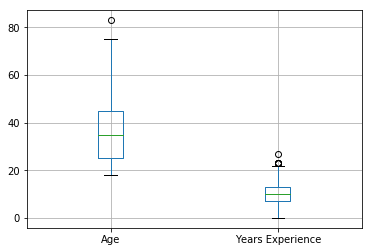

In [20]:
# Create a boxplot of two columns
so_numeric_df[['Age', 'Years Experience']].boxplot()
plt.show()

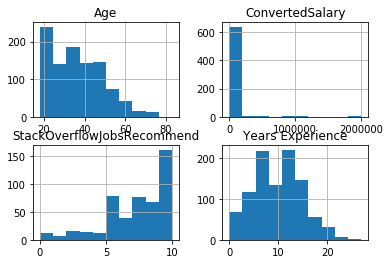

In [21]:
# Create a histogram
so_numeric_df.hist()
plt.show()

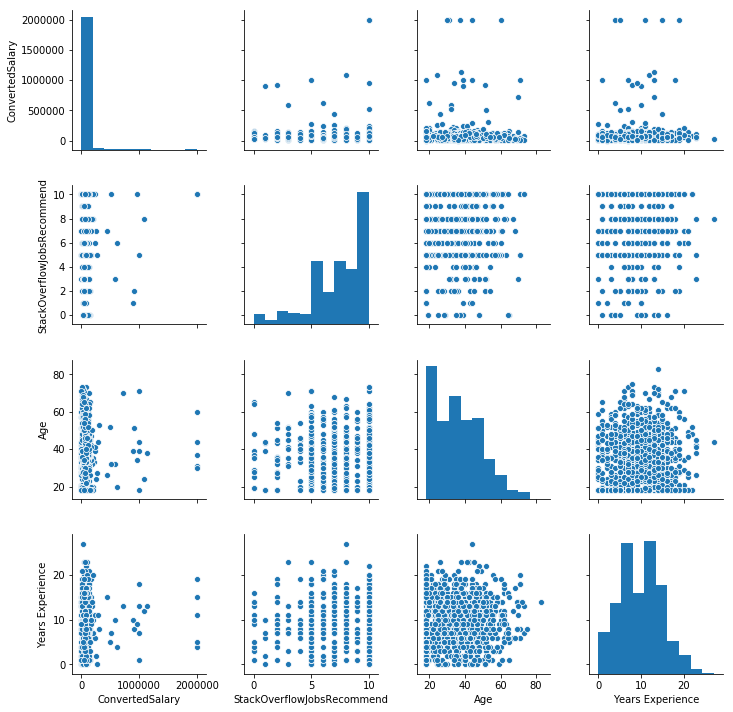

In [22]:
# Import packages
import matplotlib.pyplot as plt
import seaborn as sns

# Plot pairwise relationships
sns.pairplot(so_numeric_df)

# Show plot
plt.show()

## 3.2 Scaling and transfomation

### 3.2.1 Normalization

- In normalization you linearly scale the entire column between 0 and 1, with 0 corresponding with the lowest value in the column, and 1 with the largest.
- When using scikit-learn (the most commonly used machine learning library in Python) you can use a MinMaxScaler to apply normalization. (It is called this as it scales your values between a minimum and maximum value.)

In [23]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler
MM_scaler = MinMaxScaler()

# Fit MM_scaler to the data
MM_scaler.fit(so_numeric_df[['Age']])

# Transform the data using the fitted scaler
so_numeric_df['Age_MM'] = MM_scaler.transform(so_numeric_df[['Age']])

# Compare the origional and transformed column
print(so_numeric_df[['Age_MM', 'Age']].head())

     Age_MM  Age
0  0.046154   21
1  0.307692   38
2  0.415385   45
3  0.430769   46
4  0.323077   39


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


### 3.2.2 Standardization

- While normalization can be useful for scaling a column between two data points, it is hard to compare two scaled columns if even one of them is overly affected by outliers. One commonly used solution to this is called standardization, where instead of having a strict upper and lower bound, you center the data around its mean, and calculate the number of standard deviations away from mean each data point is.

In [24]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
SS_scaler = StandardScaler()

# Fit SS_scaler to the data
SS_scaler.fit(so_numeric_df[['Age']])

# Transform the data using the fitted scaler
so_numeric_df['Age_SS'] = SS_scaler.transform(so_numeric_df[['Age']])

# Compare the origional and transformed column
print(so_numeric_df[['Age_SS', 'Age']].head())

     Age_SS  Age
0 -1.132431   21
1  0.150734   38
2  0.679096   45
3  0.754576   46
4  0.226214   39


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()


### 3.2.3 Log transformation

- You scaled the data linearly, which will not affect the data's shape. This works great if your data is normally distributed (or closely normally distributed), an assumption that a lot of machine learning models make. Sometimes you will work with data that closely conforms to normality, e.g the height or weight of a population. On the other hand, many variables in the real world do not follow this pattern e.g, wages or age of a population

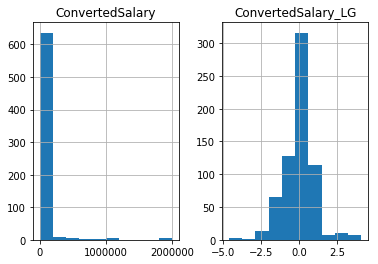

In [25]:
# Import PowerTransformer
from sklearn.preprocessing import PowerTransformer

# Instantiate PowerTransformer
pow_trans = PowerTransformer()

# Train the transform on the data
pow_trans.fit(so_numeric_df[['ConvertedSalary']])

# Apply the power transform to the data
so_numeric_df['ConvertedSalary_LG'] = pow_trans.transform(so_numeric_df[['ConvertedSalary']])

# Plot the data before and after the transformation
so_numeric_df[['ConvertedSalary', 'ConvertedSalary_LG']].hist()
plt.show()

## 3.3 Removing outliers

### 3.3.1 Percentage based outlier removal
- One way to ensure a small portion of data is not having an overly adverse effect is by removing a certain percentage of the largest and/or smallest values in the column. This can be achieved by finding the relevant quantile and trimming the data using it with a mask. This approach is particularly useful if you are concerned that the highest values in your dataset should be avoided. When using this approach, you must remember that even if there are no outliers, this will still remove the same top N percentage from the dataset.

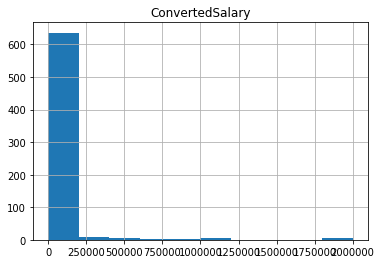

<Figure size 432x288 with 0 Axes>

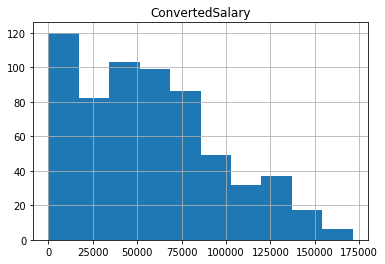

In [26]:
# Find the 95th quantile
quantile = so_numeric_df['ConvertedSalary'].quantile(0.95)

# Trim the outliers
trimmed_df = so_numeric_df[so_numeric_df['ConvertedSalary'] < quantile]

# The original histogram
so_numeric_df[['ConvertedSalary']].hist()
plt.show()
plt.clf()

# The trimmed histogram
trimmed_df[['ConvertedSalary']].hist()
plt.show()

### 3.3.2 Statistical outlier removal
- While removing the top N% of your data is useful for ensuring that very spurious points are removed, it does have the disadvantage of always removing the same proportion of points, even if the data is correct. A commonly used alternative approach is to remove data that sits further than three standard deviations from the mean. You can implement this by first calculating the mean and standard deviation of the relevant column to find upper and lower bounds, and applying these bounds as a mask to the DataFrame. This method ensures that only data that is genuinely different from the rest is removed, and will remove fewer points if the data is close together.

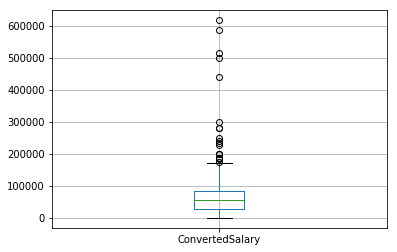

In [27]:
# Find the mean and standard dev
std = so_numeric_df['ConvertedSalary'].std()
mean = so_numeric_df['ConvertedSalary'].mean()

# Calculate the cutoff
cut_off = std * 3
lower, upper = mean - cut_off, mean + cut_off

# Trim the outliers
trimmed_df = so_numeric_df[(so_numeric_df['ConvertedSalary'] < upper)  
                           & (so_numeric_df['ConvertedSalary'] > lower)]

# The trimmed box plot
trimmed_df[['ConvertedSalary']].boxplot()
plt.show()

## 3.4 Scaling and Transforming

### 3.4.1 Train and testing transformations (I)
- When creating machine learning models you will generally build your models on historic data (train set) and apply your model to new unseen data (test set). In these cases you will need to ensure that the same scaling is being applied to both the training and test data.
- To do this in practice you train the scaler on the train set, and keep the trained scaler to apply it to the test set. You should never retrain a scaler on the test set.

In [32]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_so_numeric_df = so_numeric_df[['ConvertedSalary','Age','Years Experience']]
y_so_numeric_df = so_numeric_df[['StackOverflowJobsRecommend']]

# Split into training and test set
so_train_numeric_X, so_test_numeric_X, so_train_numeric_y, so_test_numeric_y = train_test_split(X_so_numeric_df, y_so_numeric_df, test_size = 0.2, random_state=42)

# Apply a standard scaler to the data
SS_scaler = StandardScaler()

# Fit the standard scaler to the data
SS_scaler.fit(so_train_numeric_X[['Age']])

# Transform the test data using the fitted scaler
so_test_numeric_X['Age_ss'] = SS_scaler.transform(so_test_numeric_X[['Age']])
print(so_test_numeric_X[['Age', 'Age_ss']].head())

     Age    Age_ss
453   29 -0.539044
793   25 -0.840126
209   46  0.740550
309   18 -1.367018
740   26 -0.764855


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


### 3.4.2 Train and testing transformations (II)

- Similar to applying the same scaler to both your training and test sets, if you have removed outliers from the train set, you probably want to do the same on the test set as well. Once again you should ensure that you use the thresholds calculated only from the train set to remove outliers from the test set.

In [34]:
train_std = so_train_numeric_X['ConvertedSalary'].std()
train_mean = so_train_numeric_X['ConvertedSalary'].mean()

cut_off = train_std * 3
train_lower, train_upper = train_mean - cut_off, train_mean + cut_off

# Trim the test DataFrame
trimmed_df = so_test_numeric_X[(so_test_numeric_X['ConvertedSalary'] < train_upper) \
                             & (so_test_numeric_X['ConvertedSalary'] > train_lower)]

# 4. Dealing with text data

## 4.1 Cleaning

In [35]:
speech_df = inaugral.copy()

In [36]:
# Replace all non letter characters with a whitespace
speech_df['text_clean'] = speech_df['text'].str.replace('[^a-zA-Z]', ' ')

# Change to lower case
speech_df['text_clean'] = speech_df['text_clean'].str.lower()

# Print the first 5 rows of the text_clean column
print(speech_df['text_clean'].head())

0    fellow citizens of the senate and of the house...
1    fellow citizens   i am again called upon by th...
2    when it was first perceived  in early times  t...
3    friends and fellow citizens   called upon to u...
4    proceeding  fellow citizens  to that qualifica...
Name: text_clean, dtype: object


## 4.2 High level text features

In [37]:
# Find the length of each text
speech_df['char_cnt'] = speech_df['text_clean'].str.len()

# Count the number of words in each text
speech_df['word_cnt'] = speech_df['text_clean'].str.split().str.len()

# Find the average length of word
speech_df['avg_word_length'] = speech_df['char_cnt'] / speech_df['word_cnt']

# Print the first 5 rows of these columns
print(speech_df[['text_clean', 'char_cnt', 'word_cnt', 'avg_word_length']])

                                           text_clean  char_cnt  word_cnt  \
0   fellow citizens of the senate and of the house...      8616      1432   
1   fellow citizens   i am again called upon by th...       787       135   
2   when it was first perceived  in early times  t...     13871      2323   
3   friends and fellow citizens   called upon to u...     10144      1736   
4   proceeding  fellow citizens  to that qualifica...     12902      2169   
5   unwilling to depart from examples of the most ...      7003      1179   
6   about to add the solemnity of an oath to the o...      7148      1211   
7   i should be destitute of feeling if i was not ...     19894      3382   
8   fellow citizens   i shall not attempt to descr...     26322      4466   
9   in compliance with an usage coeval with the ex...     17753      2922   
10  fellow citizens   about to undertake the arduo...      6818      1130   
11  fellow citizens   the will of the american peo...      7061      1179   

# 4.3 Word counts

In [38]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate CountVectorizer
cv = CountVectorizer()

# Fit the vectorizer
cv.fit(speech_df['text_clean'])

# Print feature names
print(cv.get_feature_names())

['abandon', 'abandoned', 'abandonment', 'abate', 'abdicated', 'abeyance', 'abhorring', 'abide', 'abiding', 'abilities', 'ability', 'abject', 'able', 'ably', 'abnormal', 'abode', 'abolish', 'abolished', 'abolishing', 'aboriginal', 'aborigines', 'abound', 'abounding', 'abounds', 'about', 'above', 'abraham', 'abreast', 'abridging', 'abroad', 'absence', 'absent', 'absolute', 'absolutely', 'absolutism', 'absorb', 'absorbed', 'absorbing', 'absorbs', 'abstain', 'abstaining', 'abstract', 'abstractions', 'absurd', 'abundance', 'abundant', 'abundantly', 'abuse', 'abused', 'abuses', 'academies', 'accept', 'acceptance', 'accepted', 'accepting', 'accepts', 'access', 'accessible', 'accession', 'accident', 'accidental', 'accidents', 'acclaim', 'accommodation', 'accommodations', 'accompanied', 'accompany', 'accomplish', 'accomplished', 'accomplishing', 'accomplishment', 'accomplishments', 'accord', 'accordance', 'accorded', 'according', 'accordingly', 'accords', 'account', 'accountability', 'accountab

In [39]:
# Apply the vectorizer
cv_transformed = cv.fit(speech_df['text_clean'])

# Print the full array
cv_array = cv.transform(speech_df['text_clean'])
print(cv_array)

  (0, 68)	1
  (0, 76)	1
  (0, 95)	1
  (0, 110)	1
  (0, 113)	1
  (0, 124)	1
  (0, 126)	1
  (0, 131)	1
  (0, 135)	1
  (0, 139)	1
  (0, 161)	2
  (0, 178)	1
  (0, 182)	1
  (0, 184)	1
  (0, 187)	1
  (0, 188)	1
  (0, 191)	1
  (0, 193)	1
  (0, 212)	1
  (0, 214)	1
  (0, 217)	1
  (0, 218)	1
  (0, 240)	1
  (0, 241)	1
  (0, 245)	1
  :	:
  (57, 8854)	1
  (57, 8858)	1
  (57, 8863)	1
  (57, 8868)	3
  (57, 8875)	3
  (57, 8876)	4
  (57, 8877)	6
  (57, 8882)	1
  (57, 8886)	1
  (57, 8912)	42
  (57, 8919)	1
  (57, 8925)	2
  (57, 8929)	1
  (57, 8939)	8
  (57, 8958)	2
  (57, 8961)	1
  (57, 8967)	1
  (57, 8968)	1
  (57, 8971)	2
  (57, 8979)	6
  (57, 9018)	2
  (57, 9019)	1
  (57, 9029)	14
  (57, 9030)	1
  (57, 9033)	11


In [40]:
# Apply the vectorizer
cv_transformed = cv.transform(speech_df['text_clean'])

# Print the full array
cv_array = cv_transformed.toarray()

# Print the shape of cv_array
print(cv_array.shape)

(58, 9043)


## 4.3.2 Limiting your features

using the CountVectorizer with its default settings creates a feature for every single word in your corpus. This can create far too many features, often including ones that will provide very little analytical value.

For this purpose CountVectorizer has parameters that you can set to reduce the number of features:

min_df : Use only words that occur in more than this percentage of documents. This can be used to remove outlier words that will not generalize across texts.
max_df : Use only words that occur in less than this percentage of documents. This is useful to eliminate very common words that occur in every corpus without adding value such as "and" or "the".

In [41]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Specify arguements to limit the number of features generated
cv = CountVectorizer(min_df=0.2,max_df=0.8)

# Fit, transform, and convert into array
cv_transformed = cv.fit_transform(speech_df['text_clean'])
cv_array = cv_transformed.toarray()

# Print the array shape
print(cv_array.shape)

(58, 818)


## 4.4 Text to DataFrame

Now that you have generated these count based features in an array you will need to reformat them so that they can be combined with the rest of the dataset. This can be achieved by converting the array into a pandas DataFrame, with the feature names you found earlier as the column names, and then concatenate it with the original DataFrame.

In [42]:
# Create a DataFrame with these features
cv_df = pd.DataFrame(cv_array, 
                     columns=cv.get_feature_names()).add_prefix('Counts_')

# Add the new columns to the original DataFrame
speech_df_new = pd.concat([speech_df, cv_df], axis=1, sort=False)
print(speech_df_new.head())

                Name         Inaugural Address                      Date  \
0  George Washington   First Inaugural Address  Thursday, April 30, 1789   
1  George Washington  Second Inaugural Address     Monday, March 4, 1793   
2         John Adams         Inaugural Address   Saturday, March 4, 1797   
3   Thomas Jefferson   First Inaugural Address  Wednesday, March 4, 1801   
4   Thomas Jefferson  Second Inaugural Address     Monday, March 4, 1805   

                                                text  \
0  Fellow-Citizens of the Senate and of the House...   
1  Fellow Citizens:  I AM again called upon by th...   
2  WHEN it was first perceived, in early times, t...   
3  Friends and Fellow-Citizens:  CALLED upon to u...   
4  PROCEEDING, fellow-citizens, to that qualifica...   

                                          text_clean  char_cnt  word_cnt  \
0  fellow citizens of the senate and of the house...      8616      1432   
1  fellow citizens   i am again called upon by th...  

## 4.5 Tf-idf

While counts of occurrences of words can be useful to build models, words that occur many times may skew the results undesirably. To limit these common words from overpowering your model a form of normalization can be used. In this lesson you will be using Term frequency-inverse document frequency (Tf-idf) as was discussed in the video. Tf-idf has the effect of reducing the value of common words, while increasing the weight of words that do not occur in many documents.

In [44]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate TfidfVectorizer
tv = TfidfVectorizer(max_features=100,stop_words='english')

# Fit the vectroizer and transform the data
tv_transformed = tv.fit_transform(speech_df['text_clean'])

# Create a DataFrame with these features
tv_df = pd.DataFrame(tv_transformed.toarray(), 
                     columns=tv.get_feature_names()).add_prefix('TFIDF_')
print(tv_df.head())

   TFIDF_action  TFIDF_administration  TFIDF_america  TFIDF_american  \
0      0.000000              0.133415       0.000000        0.105388   
1      0.000000              0.261016       0.266097        0.000000   
2      0.000000              0.092436       0.157058        0.073018   
3      0.000000              0.092693       0.000000        0.000000   
4      0.041334              0.039761       0.000000        0.031408   

   TFIDF_americans  TFIDF_believe  TFIDF_best  TFIDF_better  TFIDF_change  \
0              0.0       0.000000    0.000000      0.000000      0.000000   
1              0.0       0.000000    0.000000      0.000000      0.000000   
2              0.0       0.000000    0.026112      0.060460      0.000000   
3              0.0       0.090942    0.117831      0.045471      0.053335   
4              0.0       0.000000    0.067393      0.039011      0.091514   

   TFIDF_citizens     ...       TFIDF_things  TFIDF_time  TFIDF_today  \
0        0.229644     ...      

In [46]:
# After creating Tf-idf features you will often want to understand what are the most highest scored words for each corpus. 
# This can be achieved by isolating the row you want to examine and then sorting the the scores from high to low.
# Isolate the row to be examined
sample_row = tv_df.iloc[0]

# Print the top 5 words of the sorted output
print(sample_row.sort_values(ascending=False).head())

TFIDF_government    0.367430
TFIDF_public        0.333237
TFIDF_present       0.315182
TFIDF_duty          0.238637
TFIDF_citizens      0.229644
Name: 0, dtype: float64


In [ ]:
## 4.6 Transforming unseen data
# check the course